# Исследование объявлений о продаже квартир

**Описание проекта**
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**
Найти и исследовать зависимости влияющие на рыночную стоимость недвижимости.

**Вопросы, на которые нужно ответить в процессе исследования:**
  
1. Сколько времени обычно занимает продажа квартиры?
2. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
4. В каких населённых пунктах больше всего объявлений о продаже квартир?
5. Чему равна средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?
6. Как стоимость объектов зависит от расстояния до центра города.


**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**План работы**
1. Ознакомление с данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Общие выводы

### Откроем файл с данными и изучим общую информацию. 

**1.1 Загрузим необходимые для работы библиотеки и настройки**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)                                                    

**1.2 Загрузка датафрейма**

In [2]:
try:
    raw_data = pd.read_csv('D:\Profile\Desktop\Ya_P\Python\Projects\data\real_estate_data.csv', sep = '\t')
except:
    raw_data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

In [3]:
# Сделаем копию
data = raw_data.copy()

**1.3 Посмотрим на первые 10 и последние 10 строк датафрейма**

In [4]:
#Первые 10 строк
data.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#Последние 10 строк
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.4 Выведем информацию о типах данных и общюю информацию о датафрейме**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1. В таблице 23699 строки и 22 столбца.
2. Большое количество пропущенных данных (только 8 из 22-х столбцов не имеют пропусков).
3. Столбцы cityCenters_nearest (расстояние до центра города). parks_around3000 (число парков в радиусе 3 км), parks_around3000 (число водоёмов в радиусе 3 км) стоит перевести в змеиный регистр.
4. Cтолбец is_apartment должен иметь булев тип (bool), а не object, согласно описанию данных.
5. Столбец first_day_exposition (дата публикации) нужно привести к типу данных datetime64.
6. Столбцы floors_total (всего этажей в доме) rooms (число комнат), floor (этаж), balcony(число балконов) нужно привести к типу данных int64, потому что число этажей, балконов и комнат не может быть дробным.
7. Нужно привести к общему виду значения столбца locality_name (название населённого пункта). Разобраться с типами населенных пунктов (село, посёлок и городской посёлок), возможно оставить только названия.

***1.5 Посчитаем количество пропущенных значений в каждом столбце***

In [7]:
data.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

В 14 столбцах из 22-х есть пропущенные значения.

Больше всего пропусков в столбцах:
- is_apartment (апартаменты) - 20924
- parks_nearest (расстояние до ближайшего парка) - 15620
- ponds_nearest (расстояние до ближайшего водоема) - 14589
- balcony (число балконов) - 11519

Меньше всего пропусков в столбцах:

- locality_name (название населённого пункта) - 49
- floors_total (всего этажей в доме) - 86
- living_area (жилая площадь) - 1903
- kitchen_area (площадь кухни) - 2278
- days_exposition (сколько дней было размещено объявление) - 3181

В этой ситуации мы должны узнать, чем вызванно такое количество пропусков, спросив того, кто предоставляет данные для анализа. Было ли это допущено случайно, в связи с человеческим фактором, или данных не существовало вообще, или они были удалены преднамеренно

Информация может отстутвовать по следующим причинам:
- из-за сбоя в системе, технической ошибки
- из-за ошибки специалиста выгружающего данные (например выгрузили не полностью)
- неполное заполнение информации пользователями системы, если они не понимают подпадает ли их объект недвижимости под тот или иной критерий (как в случае с is_apartment (апартаменты))
- какие-то характерные признаки просто не существуют для данного объекта

Так-же важно понимать, могут ли пропущенные данные повлиять на репрезентативность выборки. Есть ли зависимость отсутствия таких данных от других переменных. Как можно справиться с отсутствующими значениями: удалить, заполнить или не обрабатывать.

***1.6 Построим общую гистограмму для всех столбцов датафрейма.***

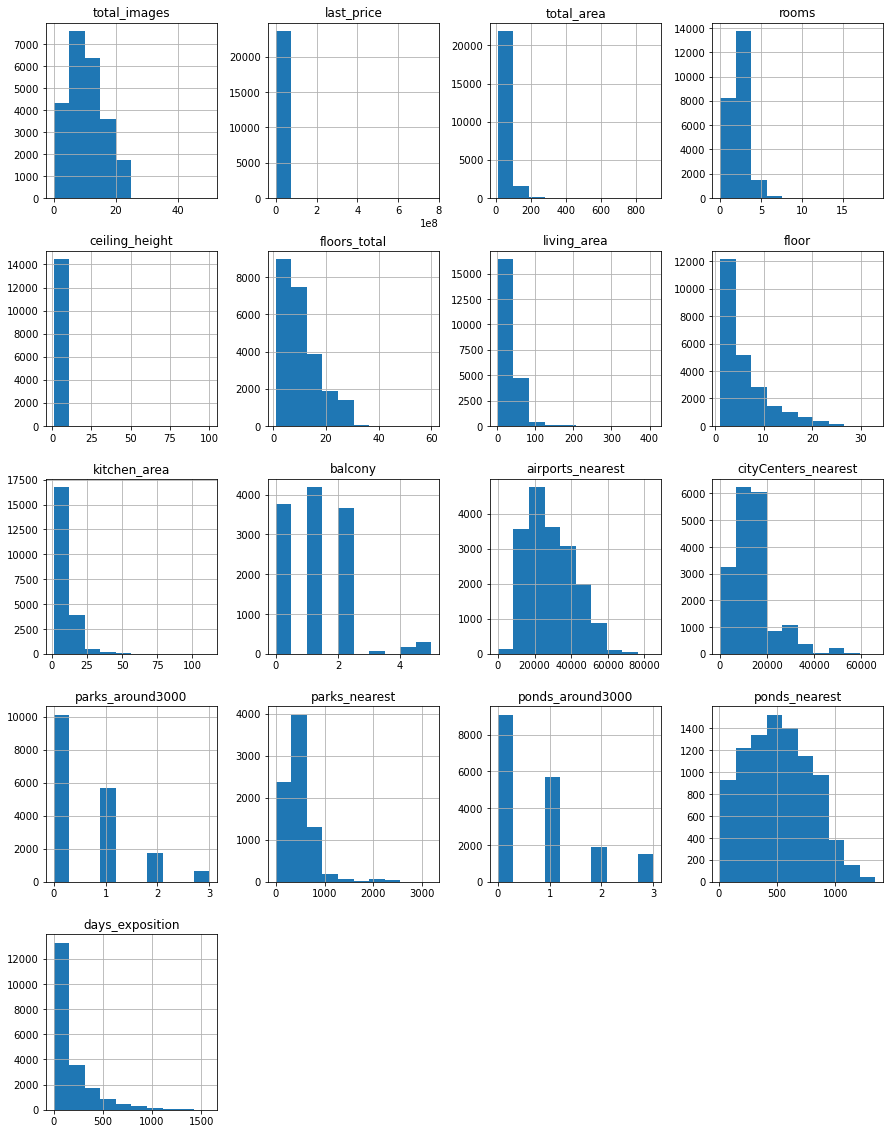

In [8]:
data.hist(figsize=(15,20))
plt.show()

Гистограмма строится по числовым значениям, поэтому вывести её для всех столбцов датафрейма невозможно.

***1.7 Посмотрим на распределение признаков датасета, методом describe().***

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим на графики и распределение признаков:

- Столбец total_images (число фотографий квартиры в объявлении) - основное количество объявленией от 0 до 20 фотографий. При этом присутвует максимум в 50 фотографий.
- Столбец last_price (цена на момент снятия с публикации) - пока очень не информативно.
- Столбец total_area (общая площадь квартиры) - странный минимум в 12м2, 75% объявлений с квартирами площадью до 69.9м2, максимум 900м2, что тоже странно.
- Столбец rooms (число комнат) - минимум 0, по умолчанию должна быть хоть одна комната или так отмечены студии. Около половины объявлений о продаже 2-х и 3-х комнатных квартир. Максимум 19 комнат, что скорее всего говорит об аномалии или уникальном предложении. Есть хвост вправо.
- Столбец ceiling_height (высота потолков) - минимальная высота потолка 1м., максимальная 100м., что кажется аномальными значениями. При этом большинство объявлений с потолками 2.5 - 2.8 м2.
- Столбец floors_total (всего этажей в доме) - странный максимум в 60 этажей - скорее всего это аномалия (самое высокое многоэтажное здания в Санкт-Петербурге и области: [ЖК «Князь Александр Невский» - 37 этажей](https://ru.wikipedia.org/wiki/%D0%9A%D0%BD%D1%8F%D0%B7%D1%8C_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9D%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_(%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81))).
- Столбец living_area (жилая площадь) - минимум в 2м2  при минимальной санитарной норме в 6м2., максимум 409.7м2. Есть большой хвост в право.
- Столбец floor (этаж) - максимум 33-й этаж при 75% объявлений с квартирами до 8-го этажа.
- Столбец kitchen_area (площадь кухни) - пропорционально похож на living_area. Так-же большой хвост вправо
- Столбец balcony (число балконов) - 75% объявлений от 0 до 2-х балконов. Максимум 5 балконов, возможно это частный сектор. Большое количество пропусков в данных - вероятно многие пользователи не заполняют этот параметр в объявлениях.
- Столбец airports_nearest (расстояние до ближайшего аэропорта) - большиство объявлений на растоянии от 10 до 60 км. Картографический признак.
- Столбец cityCenters_nearest (расстояние до центра города) - большая часть объявлений находится в черте города, но есть небольшое количество объявлений за городом. Максимальная дистанция 65.9км. Количество пропусков практичестки такое-же, как у столбца airports_nearest (расстояние до ближайшего аэропорта). Картографический признак.
- Столбец parks_around3000 (число парков в радиусе 3 км) - рядом с большинством объявлений парков нет. Максимум 3, думаю это самый центр города. Картографический признак.
- Столбец parks_nearest (расстояние до ближайшего парка) - очень много пропусков. Должна быть связь с last_price и days_exposition. Чем ближе парк, тем быстрее и дороже продастся квартира. Картографический признак.
- Столбец ponds_around3000 (число водоёмов в радиусе 3 км) - количество пропусков идентично с parks_around3000. Можно предположить, что в каждом парке находится по водоему. Картографический признак.
- Столбец ponds_nearest (расстояние до ближайшего водоёма) - количество пропусков практически, как у parks_nearest, возможно на них влияет один и тот-же фактор. Картографический признак.
- Столбец days_exposition (сколько дней было размещено объявление) - хвост в право,максимальное значение 1580 дней - больше 4-х лет, разнница между средним и медианой в 2 раза, пропуски. 

***1.8 Предварительные выводы***

1. Столбцы cityCenters_nearest (расстояние до центра города). parks_around3000 (число парков в радиусе 3 км), ponds_around3000 (число водоёмов в радиусе 3 км) стоит перевести в змеиный регистр
2. Столбец first_day_exposition (дата публикации) нужно привести к типу данных datetime64.
3. Cтолбец is_apartment привести в булев тип (bool), а не object, согласно описанию данных.
4. Столбцы floors_total (всего этажей в доме), rooms (число комнат), floor (этаж), balcony(число балконов) нужно привести к типу данных int64.
5. Необходимо разобраться с пропущенными данными в 14 столбцах. Для этого надо определить что с ними делать: удалить или пропустить, заменить на медиану/среднее или еще на какое-то значение, если это не сильно исказит общую картину.
6. В столбцах данных отвечающих за характеристики квартир, присутствуют аномальные значения. Необходимо выяснить причину их появления (умысел или ошибка).
7. Нужно проверить связь между количеством прудов и количеством парков и их влияние на стоимость недвижимости.
8. В картографических данных количество пропусков практически одинаковое, возможно имеет место быть техническая ошибка.

**Мы ознакомились с данными, посмотрели распределение значений датасета, сформировали список дальнейших действий.**


### Предобработка данных

***2.1 Выведем коэффициенты корреляции для датафрейма***

In [10]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


***2.2 Переведем столбцы cityCenters_nearest, parks_around3000, ponds_around3000 в змеиный регистр***

In [11]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

***2.3 Приведем столбец first_day_exposition к типу данных datetime64***

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

***2.4 Приведем столбец is_apartment в булев тип (bool), и обработаем пропуски***

Посмотрим количество пропусков и уникальных значений:

In [13]:
data['is_apartment'].value_counts(dropna= False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Стоит уточнить причины такого количества пропусков, возможно это следствие технической ошибки.
Апартаменты имеют отличный от квартиры юридический [статус](https://pravo.ru/story/236165/ "pravo.ru"), что влияет не только на их стоимость, но и на налогоболожение, регистрацию по месту жительства и оплату коммунальных услуг. В связи с этим я рекомендую сделать этот пункт обязательным для заполнения.

Поскольку доля апартаментов среди других объявлений выглядит вполне реалистично. Заменим пропущенные значения False

In [14]:
data['is_apartment'].fillna(False, inplace=True)

Проверим:

In [15]:
data['is_apartment'].isnull().sum()

0

***2.5 Заполним пропуски в столбце floors_total и приведем к типу данных int64***

Посмотрим количество пропусков:

In [16]:
data['floors_total'].isnull().sum()

86

Пропусков не много. Поскольку коэффициенты кореляции показали единственную связь с floor, заменим пропущенные значения в floors_total значениями floor (этажом квартиры), это не окажет сильного влияния на общую картину:

In [17]:
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype('int64')

Проверим:

In [18]:
data['floors_total'].isnull().sum()

0

***2.6 Заполним пропуски в ceiling_height***

In [19]:
data['ceiling_height'].isnull().sum()

9195

In [20]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

По распределению данных видно, что большая часть квартир имеет высоту потолка от 2.5 до 2.8м. Коэффиценты корреляции близки к нулю для остальных данных, а значит они не влияют на высоту потолка. Следовательно мы заполним пропущенные значения медианой.

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Проверим

In [22]:
data['ceiling_height'].isnull().sum()

0

***2.7 Уберем пропуски в balcony***

In [23]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [24]:
data['balcony'].isna().sum()

11519

Около половины столбца пропущено. В идеале стоит спросить о причине у дата-инженеров, но сейчас предположим, что их не указали при заполнении объявления, в связи с отсутвием балконов. Темболее, что коэффициент корреляции с другими признаками стремится к нулю. Заменим пропуски на ноль.

In [25]:
data['balcony'].fillna(0, inplace=True)

Проверим:

In [26]:
data['balcony'].isna().sum()

0

Преобразуем в int64

In [27]:
data['balcony']=data['balcony'].astype('int64')

***2.8 Разберемся с пропусками в living_area и total_area***

In [28]:
data[['living_area', 'kitchen_area']].isna().sum()

living_area     1903
kitchen_area    2278
dtype: int64

Заполним пропуски в living_area и kitchen_area средним коэффициентом отношения total_area к living_area и kitchen_area. В строках с пропусками умножим соответствующую total_area на эти коэффициенты.

In [29]:
ratio_living_total = (data['living_area']/data['total_area']).mean()
ratio_living_total

0.5647655216993298

В среднем living_area составляет 56% от total_area

Заменим пропуски в living_area значениями из столбца total_area * ratio_living_total

In [30]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * ratio_living_total)

Аналогично поступим и для kitchen_area

In [31]:
ratio_kitchen_total = (data['kitchen_area']/data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ratio_kitchen_total)

Проверим:

In [32]:
data[['living_area', 'kitchen_area']].isna().sum()

living_area     0
kitchen_area    0
dtype: int64

***2.9 Посмотрим на остальные пропуски в процентах:***

In [33]:
data.isnull().sum() / len(data) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Пропуски в столбцах:
- airports_nearest
- city_centers_nearest
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest

Это картографические признаки. Данных по адресам у нас нет, поэтому заполнить их не представляется возможным. Оставим, как есть.

***2.10 Пропущенные данные в days_exposition (сколько дней было размещено объявление)***

Возможно объявления еще небыли сняты на момент вызгрузки базы. Удалять 13% данных мы не будем, а заменить реальными данными не можем. Оставим как есть.

***2.11 Пропущенные значения в locality_name (название населённого пункта)***

In [34]:
data['locality_name'].isna().sum()

49

В названиях населённых пунктов мы нашли 49 пропусков. Заполнить их достоверными данными мы не можем. Удалять мы их тоже не будем, так как в этих строках может содержаться ценная для исследования информация. Заполним их значением "Неизвестно"

In [35]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [36]:
data['locality_name'].isna().sum()

0

***2.11 Займемся устранением неявных дубликатов в locality_name (название населённых пунктов)***

In [37]:
#Создадим функцию расчета количества уникальных значений для удобства
def loc_len():
    return print('Количество уникальных значений locality_name:', data['locality_name'].unique().shape[0])
loc_len()

Количество уникальных значений locality_name: 365


Посмотрим на уникальные значения и их количество:

In [38]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Неизвестно',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровс

Мы выявили 365 уникальных значений. Заменим "ё" на "е", "городской поселок" на "поселок городского типа", "котеджный поселок" на "поселок", "садоводческое некоммерческое товарищество" на "садовое товарищество", "поселок при железнодорожной станции" на "поселок", "поселок станции" на поселок.

In [39]:
data['locality_name'] = data['locality_name'].str.replace(
    'ё', 'е').str.replace(
    'городской поселок', 'поселок городского типа').str.replace(
    'коттеджный поселок', 'поселок').str.replace(
    'садоводческое некоммерческое товарищество', 'садовое товарищество').str.replace(
    'поселок при железнодорожной станции', 'поселок').str.replace(
    'поселок станции', 'поселок')
loc_len()

Количество уникальных значений locality_name: 320


Мы устранили 45 неявных дубликатов. Типы населенных пунктов мы оставим, так как это действительно разные населенные пунткы(проверенно по Яндекс картам).

***2.12 С обработкой пропусков закончили, займемся аномалиями***

Выведем распределение признаков датасета, методом describe().

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.671463,34.562480,5.892358,10.572683,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.595802,22.326965,4.885249,6.095394,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.080000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


***2.13 Проверим аномалии в ceiling_height***

Построим график высот потолков:

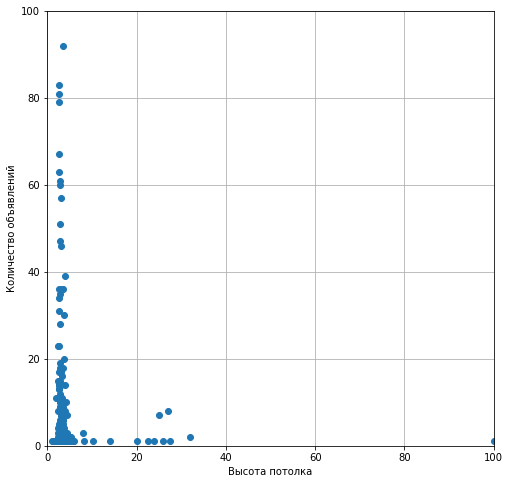

In [41]:
data["ceiling_height"].value_counts().plot(style='o',xlim=(0, 100),ylim=(0, 100)\
    ,grid=True, figsize=(8, 8), xlabel='Высота потолка', ylabel='Количество объявлений');

Полагаю, что значения типа 25м. и 35м. являются опечаткой, вызванной пропущеной точкой, и если их разделить на 10, то мы получим реальную высоту потолка. Согласно [СНиП 31-01-2003](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye), минимальная высота потолка должна быть 2.5м. Учитывая, что у нас имеются апартаменты и частный сектор, будем считать аномалиями высоту до 2.5м. и после 8м. Поэтому сначала избавимся от аномалий выше 8м.:

In [42]:
data.loc[data['ceiling_height'] > 8, 'ceiling_height'] = data.loc[data['ceiling_height'] > 8, 'ceiling_height'] / 10

Затем заменим высоту до 2.5м. на 2.5м.

In [43]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

Проверим устранение аномалий:

In [44]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698286
std          0.233182
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Аномалии устранены

***2.14 Посмотрим аномалии в floors_total***

Учитывая, что самое высокое здание в Санкт-Петербурге имеет 37 этажей, а самый высокий этаж в объявлениях(floor.max()) равен 33, ограничим максимум этажности домов 37 этажами:

In [45]:
data.loc[data['floors_total'] > 37, 'floors_total'] = data.loc[data['floors_total'] > 37, 'floor']

Проверим наличие квартир выше, чем этажность дома.

In [46]:
len(data.loc[data['floors_total'] < data['floor']])

0

Аномалии устранены

***2.15 Посмотрим аномалии в total_area***

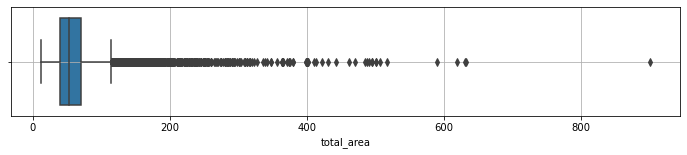

In [47]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['total_area'])
plt.grid();

Видны выбросы в сторону увелечения. Рассмотрим по подробнее и сравним с другими столбцами:

In [48]:
(
data[['total_area','last_price', 'rooms']]
.sort_values(by='total_area', ascending=False)
.sort_values(by='last_price', ascending=False).head(10)      
)

,total_area,last_price,rooms
12971,400.0,763000000.0,7
19540,900.0,420000000.0,12
14706,401.0,401300000.0,5
1436,190.0,330000000.0,3
15651,618.0,300000000.0,7
22831,187.5,289238400.0,2
16461,285.7,245000000.0,6
13749,410.0,240000000.0,6
5893,500.0,230000000.0,6
8900,268.0,190870000.0,3


Посчитаем количество объявлений выше 200м2:

In [49]:
print('Количество квартир с общей площадью более 200м2 - ', len(data[data['total_area']>199.999]))
print(f'Что составляет - {round((len(data[data["total_area"]>199.999])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество квартир с общей площадью более 200м2 -  231
Что составляет - 0.97% от данных


В максимальных значениях объявления с высокими площадью и ценой, сильно влияют на характеристики остальных объявлений. При этом они составляют всего 1% от всех объявлений, когда 75% имеют площадь до 70-ти м2. Удалим эти объявления.

In [50]:
data = data.loc[data['total_area'] < 199.999]

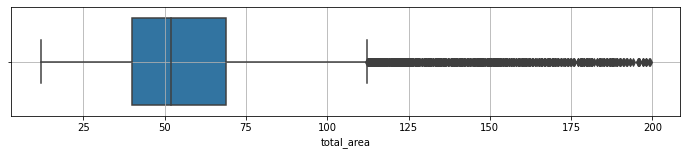

In [51]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['total_area'])
plt.grid();

In [52]:
data['total_area'].describe()

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

Максимальные аномальные значения убраны, удалена 231 строка. Займемся минимальными:

In [53]:
(
    data[['total_area', 'last_price', 'rooms', 'studio','is_apartment', 'open_plan', 'living_area']]
    .sort_values(by='total_area').head(10)
)

,total_area,last_price,rooms,studio,is_apartment,open_plan,living_area
19904,12.0,2400000.0,1,False,False,False,10.000000
19546,13.0,1850000.0,1,False,False,False,7.341952
19807,13.0,3800000.0,1,False,False,False,10.000000
17961,13.0,1400000.0,1,False,False,False,7.341952
19558,13.2,1686000.0,1,False,False,False,7.454905
19642,14.0,1190000.0,1,False,False,False,11.000000
16949,15.0,1550000.0,1,False,False,False,8.471483
12040,15.0,1900000.0,1,False,False,False,8.471483
8886,15.5,2450000.0,0,True,False,False,10.000000
9412,16.0,2100000.0,0,False,False,True,13.000000


Согласно [закону Санкт-Петербурга от 19 июля 2005 г. N 407-65, гл. 1, ст. 3](https://base.garant.ru/7948784/5ac206a89ea76855804609cd950fcaf7/), минимальная площадь жилого помещения составляет 15м2. Поскольку квартиры в объявлениях с площадью ниже 15м2 не являются апартаментами, приведем их к нормативному минимуму.

In [54]:
print('Количество квартир с общей площадью менее 15м2 - ', len(data[data['total_area']<14.999]))
print(f'Что составляет - {round((len(data[data["total_area"]<14.999])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество квартир с общей площадью менее 15м2 -  6
Что составляет - 0.03% от данных


Приведем эти данные в нормативный вид.

In [55]:
data.loc[data['total_area'] < 14.999, 'total_area'] = 15

In [56]:
data['total_area'].describe()

count    23468.000000
mean        58.156131
std         26.468639
min         15.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

Проверим чтобы жилая площадь не превышала общую.

In [57]:
len(data[['total_area', 'living_area']].query('total_area < living_area'))

0

Преобразуем в int64:

In [58]:
data['total_area']=data['total_area'].astype('int64')

Минимальные аномальные значения убраны.

Аномалии устранены, удалена 231 строка

***2.16 Уберем аномалии из living_area***

In [59]:
data['living_area'].describe()

count    23468.000000
mean        33.262930
std         17.249578
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Посмотрим на минимальные значения вместе с другими признаками:

In [60]:
(
    data[['living_area', 'total_area', 'last_price', 'rooms', 'studio','is_apartment', 'open_plan']]
    .sort_values(by='living_area').head(20)
)

,living_area,total_area,last_price,rooms,studio,is_apartment,open_plan
13915,2.000000,52,6350000.0,2,False,False,False
21758,2.000000,23,2330000.0,0,True,False,False
23574,3.000000,139,64990000.0,3,False,False,False
3242,3.000000,41,4440000.0,1,False,False,False
17582,5.000000,22,2680000.0,0,True,False,False
21943,5.400000,77,6100000.0,4,False,False,False
16431,6.000000,31,3799000.0,1,False,False,False
19251,6.500000,33,4050000.0,1,False,False,False
17961,7.341952,15,1400000.0,1,False,False,False
19546,7.341952,15,1850000.0,1,False,False,False


Минимальное значение - 2м2. Учитывая, что [минимальная жилая площадь должна составлять 9м2](https://base.garant.ru/7948784/5ac206a89ea76855804609cd950fcaf7/), посчитаем количество строк до 9м2

In [61]:
print('Количество квартир с жилой площадью менее 9м2 - ', len(data[data['living_area']<8.999]))
print(f'Что составляет - {round((len(data[data["living_area"]<8.999])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество квартир с жилой площадью менее 9м2 -  19
Что составляет - 0.08% от данных


Всего 19 строк. Приведем в нормативный вид.

In [62]:
data.loc[data['living_area'] < 8.999, 'living_area'] = 9

Посмотрим на максимальные значения вместе с другими признаками:

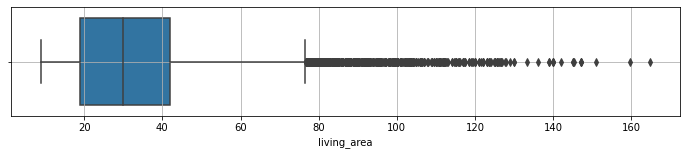

In [63]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['living_area'])
plt.grid();

In [64]:
(
    data[['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms', 'studio','is_apartment', 'open_plan']]
    .sort_values(by='living_area', ascending=False).head(10)
)

,living_area,total_area,kitchen_area,last_price,rooms,studio,is_apartment,open_plan
21676,164.7,181,10.700000,23600000.0,4,False,False,False
22904,159.6,190,21.000000,19500000.0,6,False,False,False
9392,150.8,195,17.700000,19500000.0,6,False,False,False
11800,147.2,192,17.800000,20295200.0,6,False,False,False
20264,147.0,187,15.600000,119000000.0,4,False,False,False
11438,147.0,198,16.000000,34979000.0,5,False,False,False
18790,145.4,197,17.500000,15000000.0,5,False,False,False
22420,145.0,196,17.000000,25000000.0,7,False,False,False
16199,145.0,189,35.410046,19000000.0,6,False,False,False
4710,142.0,184,15.000000,18000000.0,5,False,False,False


Барплот показывает выбросы. Посмотрим сколько значений будет полсе 140м2.:

In [65]:
print('Количество квартир с жилой площадью более 140м2 - ', len(data[data['living_area']>=140]))
print(f'Что составляет - {round((len(data[data["living_area"]>=140])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество квартир с жилой площадью более 140м2 -  13
Что составляет - 0.05% от данных


13 строк. Удалим их.

In [66]:
data = data.loc[data['living_area'] <= 140]

Проверим:

In [67]:
data['living_area'].describe()

count    23458.000000
mean        33.215520
std         17.082002
min          9.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        140.000000
Name: living_area, dtype: float64

Приведем к типу данных int64

In [68]:
data['living_area'] = data['living_area'].astype('int64')

Аномальные значения убраны. Удалено 13 строк.

***2.17 Проверим kitchen_area на предмет аномалий***

In [69]:
data['kitchen_area'].describe()

count    23458.000000
mean        10.343055
std          5.352715
min          1.300000
25%          7.000000
50%          9.000000
75%         11.950000
max         93.200000
Name: kitchen_area, dtype: float64

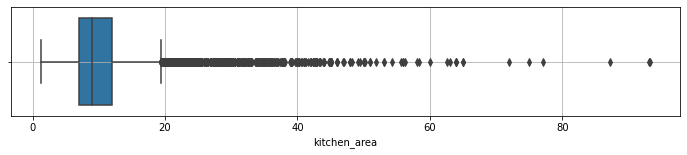

In [70]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['kitchen_area'])
plt.grid();

Минимальное значение - 1.3м2, при [минимуме по законодательсву (СНиП 31-01-2003)](https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php#:~:text=%D0%92%C2%A0%D0%BE%D0%B4%D0%BD%D0%BE%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D0%BD%D1%8B%D1%85%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B0%D1%85%20%D0%B4%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%B5%D1%82%D1%81%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%20%D0%B8%D0%BB%D0%B8%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%2D%D0%BD%D0%B8%D1%88%D0%B8%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%D1%8E%20%D0%BD%D0%B5%20%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%205%20%D0%BC%C2%B2.) - 5м2 для однокомнатных и 6м2 для остальных. И максимальное значение в 93.2м2 выглядит как выброс и он четко выражен на боксплоте.
Займемся сначала минимумом:

Посчитаем количество квартир с площадью кухни меньше 5м2:

In [71]:
print('Количество квартир с площадью кухни менее 5м2 - ', len(data[data['kitchen_area']<4.999]))
print(f'Что составляет - {round((len(data[data["kitchen_area"]<4.999])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество квартир с площадью кухни менее 5м2 -  348
Что составляет - 1.47% от данных


Очень много строк для замены значений на минимально допустимое. Может повлиять на исследование, поэтому удалим их.

In [72]:
data = data.loc[data['kitchen_area'] > 4.999]

Теперь посмотрим на максимум вместе с другими параметрами:

In [73]:
(
data[['kitchen_area','living_area','total_area','last_price','is_apartment', 'studio', 'open_plan']]
.sort_values(by='kitchen_area', ascending=False).head(10)      
)

,kitchen_area,living_area,total_area,last_price,is_apartment,studio,open_plan
16239,93.2,58,181,82400000.0,False,False,False
16797,93.0,40,146,65850000.0,False,False,False
10867,87.2,87,177,56844500.0,True,False,False
4394,77.0,95,174,57000000.0,False,False,False
14644,75.0,58,150,47000000.0,False,False,False
16647,72.0,36,145,122000000.0,False,False,False
22980,65.0,72,155,24500000.0,False,False,False
18447,65.0,120,187,21800000.0,False,False,False
17912,64.0,52,166,135000000.0,False,False,False
15780,64.0,36,119,12990000.0,False,False,False


Посчитаем сколько выбросов после 60м2 

In [74]:
print('Количество квартир с площадью кухни более 60м2 - ', len(data[data['kitchen_area']>60]))
print(f'Что составляет - {round((len(data[data["kitchen_area"]>60])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество квартир с площадью кухни более 60м2 -  13
Что составляет - 0.05% от данных


13 строк. Удалим их.

In [75]:
data = data.loc[data['kitchen_area'] < 60]

Проверим:

In [76]:
data['kitchen_area'].describe()

count    23096.000000
mean        10.397396
std          5.115689
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max         58.400000
Name: kitchen_area, dtype: float64

Аномальные значения убраны. Удалено 362 строки.

***2.18 Посмотрим аномалии в last_price***

In [77]:
data['last_price'].describe()

count    2.309600e+04
mean     6.033270e+06
std      6.037430e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

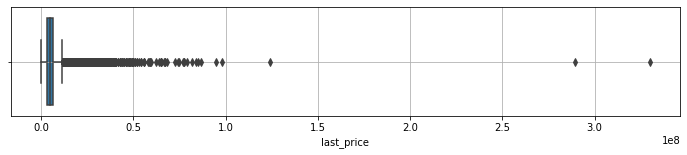

In [78]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['last_price'])
plt.grid();

Виден большой разброс от 12 тысяч до 330 миллионов. Это сильно портит статистику. Попробуем отсеять самые дорогие объявления.

In [79]:
print('Количество объявлений с ценой более 40 миллионов - ', len(data[data['last_price']>40000000]))
print(f'Что составляет - {round((len(data[data["last_price"]>40000000])*100)/(raw_data.shape[0]), 2)}% от данных')

Количество объявлений с ценой более 40 миллионов -  77
Что составляет - 0.32% от данных


77 строк. Удалим их.

In [80]:
data = data.loc[data['last_price'] < 40000000]

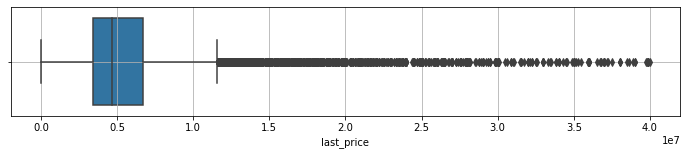

In [81]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['last_price'])
plt.grid();

Посмотрим на минимальные значения вместе с другими признаками:

In [82]:
(
data[['last_price','kitchen_area','living_area','total_area','rooms']]
.sort_values(by='last_price').head()      
)

,last_price,kitchen_area,living_area,total_area,rooms
8793,12190.0,40.500000,32,109,2
17456,430000.0,6.000000,16,30,1
14911,430000.0,10.117156,30,54,2
16274,440000.0,7.494190,22,40,1
5698,450000.0,5.800000,23,42,2


Скорее всего объявление с с ценой в 12 тысяч, это опечатка. Посмотрим на аналогичные объявления:

In [83]:
data[['last_price','kitchen_area','living_area','total_area','rooms','city_centers_nearest']].query('99<total_area<110 and rooms ==2')\
.sort_values(by='city_centers_nearest', ascending=False).head(20)

,last_price,kitchen_area,living_area,total_area,rooms,city_centers_nearest
13211,7700000.0,17.600000,45,102,2,31239.0
15578,16000000.0,26.900000,48,101,2,27355.0
140,16912000.0,15.400000,48,105,2,26506.0
6671,15500000.0,30.000000,47,104,2,14764.0
20853,15990000.0,13.400000,58,105,2,12445.0
17434,11500000.0,17.000000,74,100,2,11956.0
12579,17500000.0,37.600000,40,104,2,10905.0
18169,12600000.0,19.000000,53,109,2,9781.0
14276,21500000.0,13.000000,55,107,2,9734.0
8793,12190.0,40.500000,32,109,2,9176.0


При сортировке обнаружились объявления с похожими признаками. Это действительно опечатка. Автор не дописал 3 нуля. Исправим:

In [84]:
data['last_price'] = data['last_price'].replace (12190.00, 12190000.00)

Проверим:

In [85]:
data['last_price'].describe()

count    2.301200e+04
mean     5.827375e+06
std      4.302041e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.646500e+06
75%      6.700000e+06
max      3.999000e+07
Name: last_price, dtype: float64

Поменяем тип данных на int64

In [86]:
data['last_price'] = data['last_price'].astype('int64')

Аномалии убраны. Удалено 77 строк.

***2.19 Проверим аномалии в rooms***

In [87]:
data['rooms'].describe()

count    23012.000000
mean         2.044281
std          0.982792
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

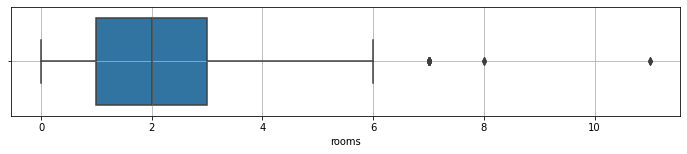

In [88]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['rooms'])
plt.grid();

75% укладываются в 3 комнаты. Посмотрим на 7-11 комнат, возможно это коммунальные квартиры или частный сектор. И посмотрим на 0 комнат, восможно это студии и квартиры свободной планировки.

In [89]:
data[['rooms', 'locality_name', 'city_centers_nearest', 'total_area', 'last_price']].query('rooms > 7')

,rooms,locality_name,city_centers_nearest,total_area,last_price
648,11,Санкт-Петербург,3148.0,183,17500000
4435,8,Санкт-Петербург,1152.0,191,22190000
8758,8,Санкт-Петербург,4782.0,150,16100000
9688,11,Санкт-Петербург,1015.0,194,33000000


Очень похоже на коммунальные квартиры в старом фонде.

In [90]:
(
data[['rooms', 'open_plan', 'studio']]
    .query('rooms == 0 and open_plan == False and studio == False')
)

,rooms,open_plan,studio


Отсуствие комнат характерно для свободной планировки или студий, что мы и подтвердили.

Аномалий не обнаружено.

***Проверим на аномалии days_exposition***

In [91]:
data['days_exposition'].describe()

count    19937.000000
mean       180.056879
std        218.437373
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Проверим гипотезу, что пропуски были из-за того, что на момент выгрузки базы объявления были опубликованы. Построим гистограмму:

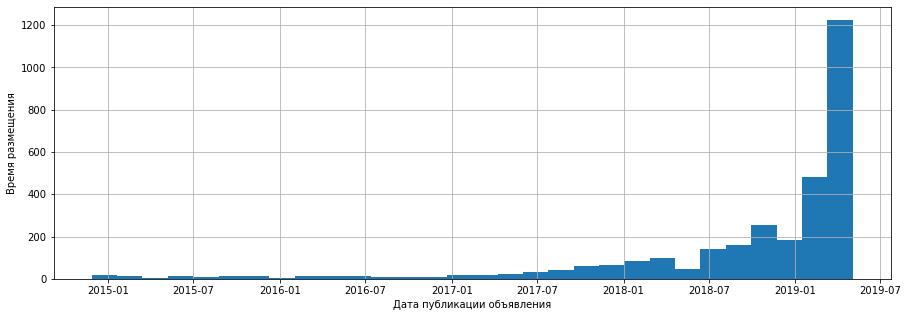

In [92]:
data.query('days_exposition.isna()')['first_day_exposition'].hist(bins=30, figsize=(15, 5))
plt.xlabel('Дата публикации объявления')
plt.ylabel('Время размещения');

Гистограмма показывает, что скорее всего объявления оставались опубликованными в момент выгрузки базы. Оставим пропуски как есть. Проверим странный максимум длинной в 4 года. Посчитаем количество объявлений, размещенных дольше чем год:

In [93]:
print('Количество объявлений, размещенных дольше чем год:', len(data.query('days_exposition > 365')))

Количество объявлений, размещенных дольше чем год: 2947


Поскольку объявлений, размещенных дольше чем год, практически 3000, можем сделать вывод, что это в порядке вещей. 

Аномалии отсутвуют. 

***2.20 Проверим на аномалии total_images***

In [94]:
data['total_images'].describe()

count    23012.000000
mean         9.857944
std          5.662984
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Пропуски отсутвуют, в среднем 9 фотографий для объявления о продаже квартиры. Посмотрим на максимум:

In [95]:
(
data[['total_images', 'locality_name', 'last_price', 'rooms','floor', 'city_centers_nearest']]
    .query('total_images > 30.00')
)

,total_images,locality_name,last_price,rooms,floor,city_centers_nearest
99,32,Санкт-Петербург,9600000,4,2,2818.0
308,35,Красное Село,5700000,3,2,30670.0
1058,39,деревня Лопухинка,1900000,3,5,NaN
5349,31,Санкт-Петербург,11990000,3,22,11209.0
7393,32,Санкт-Петербург,8290000,4,4,2342.0
7938,32,Санкт-Петербург,17000000,3,4,3555.0
9778,50,Санкт-Петербург,11000000,2,11,11649.0
10523,35,Санкт-Петербург,17000000,3,6,6255.0
12667,50,Санкт-Петербург,20500000,3,16,16141.0
15157,42,Санкт-Петербург,17998000,4,17,11920.0


Выглядят как обычные объявления, но с большим количеством фотографий. Оставим без изменений.

Аномалий не обнаружено.

***2.21 airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000 - картографические данные***

In [96]:
(
data[['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 
      'parks_nearest', 'ponds_around_3000','ponds_nearest']].describe()
)

,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
count,17643.000000,17663.000000,17664.000000,7780.000000,17664.000000,8750.000000
mean,28866.975968,14321.275661,0.598845,493.311311,0.756114,521.758629
std,12690.086168,8568.467351,0.789209,343.924133,0.929592,277.141638
min,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000
25%,18503.000000,9504.500000,0.000000,288.000000,0.000000,302.000000
50%,26880.000000,13181.000000,0.000000,456.000000,0.000000,505.000000
75%,37407.000000,16357.000000,1.000000,613.000000,1.000000,733.000000
max,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000


Это картографические данные, заполненные автоматически. Причиной пропусков может быть либо системная ошибка, либо пользователь не указал адрес продаваемой квартиры, что было бы странно. Заполнять их чем либо мы не можем, потому как нет данных. Но можем удалить ноль из airports_nearest, потому что в аэропорте не может быть квартиры на продажу - это ошибка. В остальном пока оставим, как есть.

In [97]:
data = data[data.airports_nearest != 0] 

Проверим:

In [98]:
data['airports_nearest'].sort_values().head()

12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
22283    6989.0
Name: airports_nearest, dtype: float64

Преобразуем в int64:

In [99]:
col_retype_lst = ['airports_nearest', 'city_centers_nearest', 'parks_around_3000',\
                  'parks_nearest', 'ponds_around_3000', 'ponds_nearest']
for column in col_retype_lst:
        try:
            data[column] = data[column].astype('Int64')
        except:
            print(data[column], 'Что-то пошло не так')
   

***2.22 Проверим типы данных***

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23011 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23011 non-null  int64         
 1   last_price            23011 non-null  int64         
 2   total_area            23011 non-null  int64         
 3   first_day_exposition  23011 non-null  datetime64[ns]
 4   rooms                 23011 non-null  int64         
 5   ceiling_height        23011 non-null  float64       
 6   floors_total          23011 non-null  int64         
 7   living_area           23011 non-null  int64         
 8   floor                 23011 non-null  int64         
 9   is_apartment          23011 non-null  bool          
 10  studio                23011 non-null  bool          
 11  open_plan             23011 non-null  bool          
 12  kitchen_area          23011 non-null  float64       
 13  balcony         

***2.23 Выводы:***

На этом этапе мы:
- обработали пропущенные данные, где это было возможно
- изменили типы данных
- избавились от аномалий в данных

In [101]:
print(f'От основного датафрейма осталось - {round((len(data)*100)/(raw_data.shape[0]), 2)}% данных')

От основного датафрейма осталось - 97.1% данных


- устранили неявные дубликаты
- описали выявленые проблемы датасета

### Посчитайте и добавьте в таблицу новые столбцы

***3.1 Добавим в таблицу цену одного квадратного метра***

In [102]:
data['square_meter_price'] = (data['last_price']/data['total_area']).astype('int')

***3.2 Добавим в таблицу день публикации объявления (0 - понедельник, 1 - вторник и т.д.)***

In [103]:
data['weekday_publication'] = data['first_day_exposition'].dt.weekday

***3.3 Добавим в таблицу месяц публикации объявления***

In [104]:
data['month_publication'] = data['first_day_exposition'].dt.month

***3.4 Добавим в таблицу год публикации объявления***

In [105]:
data['year_publication'] = data['first_day_exposition'].dt.year

***3.5 Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)***

Создадим функцию, которая будет нам возвращать необходимые значения статуса 

In [106]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [107]:
data['type_floor'] = data.apply(type_floor, axis = 1)

***3.6 Добавим в таблицу расстояние в км до центра города***

In [108]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).astype('Int64')

Проверим

In [109]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_publication,month_publication,year_publication,type_floor,city_centers_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019,другой,16
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11.0,2,поселок Шушары,12817,18603,0,<NA>,0,<NA>,81.0,83750,1,12,2018,первый,18
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785,3,8,2015,другой,13
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000,1,6,2018,другой,8
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,False,False,9.1,0,поселок городского типа Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55.0,96333,0,9,2018,другой,<NA>


***3.7 Выводы:***

На этом этапе мы:
- Добавили в таблицу цену одного квадратного метра
- Добавили в таблицу день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- Добавили в таблицу месяц публикации объявления
- Добавили в таблицу год публикации объявления
- Добавили в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)
- Добавили в таблицу расстояние в км до центра города

**Данные подготовлены для исследовательского анализа.**

### Проведите исследовательский анализ данных

***Изучем и опишем следующие параметры:***
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

***4.1 Общая площадь***

In [110]:
data['total_area'].describe()

count    23011.000000
mean        57.944896
std         25.549113
min         20.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        199.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Количество объявлений')

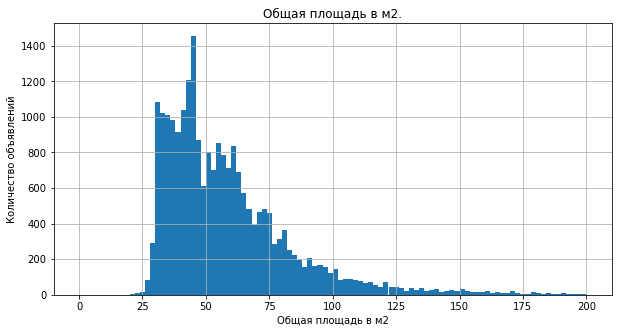

In [111]:
data['total_area'].hist(bins=100,range=(0, 200), figsize=(10, 5))
plt.title('Общая площадь в м2.');
plt.xlabel('Общая площадь в м2')
plt.ylabel('Количество объявлений')

- Большинство квартир имеют общую площадь от 40 до 69 м2. 
- Средняя общая площадь квартиры - 57.94 м2. 
- Медиана составляет - 52.00 м2. 
- Минимальная общая площадь квартиры - 20 м2. 
- Максимальная общая площадь квартиры - 199 м2.

***4.2 Жилая площадь***

In [112]:
data['living_area'].describe()

count    23011.000000
mean        32.985659
std         16.814114
min          9.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        140.000000
Name: living_area, dtype: float64

Text(0, 0.5, 'Количество объявлений')

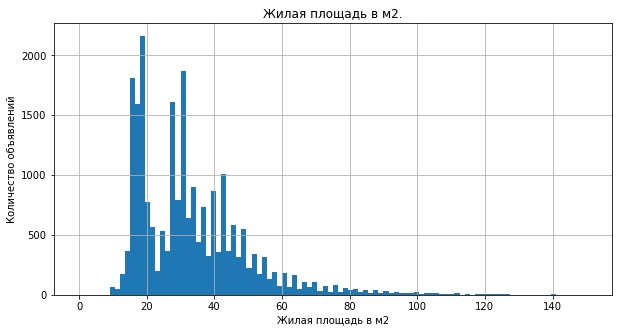

In [113]:
data['living_area'].hist(bins=100,range=(0, 150), figsize=(10, 5))
plt.title('Жилая площадь в м2.');
plt.xlabel('Жилая площадь в м2')
plt.ylabel('Количество объявлений')

- Большинство квартир имеют жилую площадь от 19 до 42 м2. 
- Средняя жилая площадь квартиры - 32.99 м2. 
- Медиана составляет - 30 м2. 
- Минимальная общая площадь квартиры - 9 м2. 
- Максимальная общая площадь квартиры - 140 м2.

***4.3 Площадь кухни***

In [114]:
data['kitchen_area'].describe()

count    23011.000000
mean        10.348575
std          5.020000
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max         58.400000
Name: kitchen_area, dtype: float64

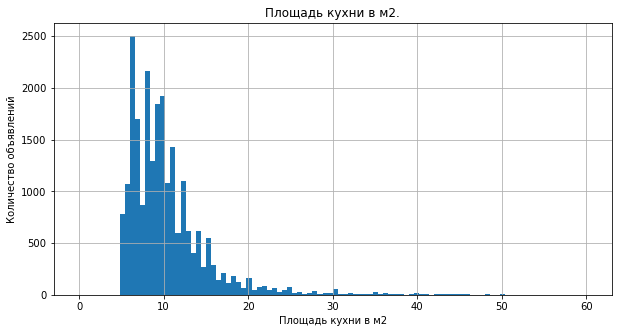

In [115]:
data['kitchen_area'].hist(bins=100,range=(0, 60), figsize=(10, 5))
plt.title('Площадь кухни в м2.')
plt.xlabel('Площадь кухни в м2')
plt.ylabel('Количество объявлений');

- Большинство квартир имеют площадь кухни от 7 до 12 м2.
- Средняя жилая площадь кухни - 10.35 м2.
- Медиана составляет - 9.10 м2.
- Минимальная общая площадь кухни - 5 м2.
- Максимальная общая площадь квартиры - 58.40 м2.

***4.4 Цена объекта***

In [116]:
data['last_price'].describe()

count    2.301100e+04
mean     5.827324e+06
std      4.302128e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.646000e+06
75%      6.700000e+06
max      3.999000e+07
Name: last_price, dtype: float64

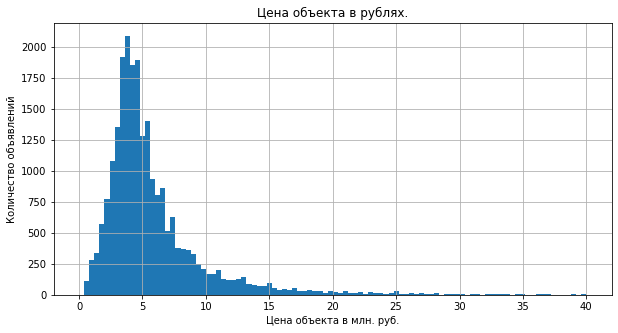

In [117]:
(data['last_price']/1000000).hist(bins=100,range=(0, 40), figsize=(10, 5))
plt.title('Цена объекта в рублях.')
plt.xlabel('Цена объекта в млн. руб.')
plt.ylabel('Количество объявлений');

- Большинство квартир стоят от 3450000 до 6700000 р.
- Средняя стоимость квартиры - 5827374.69 р.
- Медиана составляет - 4646500 р.
- Минимальная стоимость квартиры - 430000 р.
- Максимальная стоимость квартиры - 39990000 р.

***4.4 Количество комнат***

In [118]:
data['rooms'].describe()

count    23011.000000
mean         2.044327
std          0.982789
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Количество объявлений')

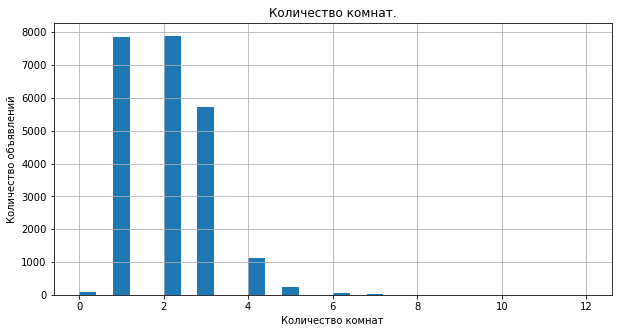

In [119]:
data['rooms'].hist(bins=30,range=(0, 12), figsize=(10, 5))
plt.title('Количество комнат.');
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

- В большинстве квартир от 1-й до 3-х комнат.
- В среднем в квартирах - 2 комнаты.
- В некоторых квартирах комнаты отсутвуют. Это или студии или квартиры свободной планировки.
- Максимальное количество комнат в квартире - 11. Но квартир с количеством комнат от 6 до 11, практитчески также мало, как  студий и квартир свбодной планировки.

***4.5 Высота потолков***

In [120]:
data['ceiling_height'].describe()

count    23011.000000
mean         2.692455
std          0.220900
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество объявлений')

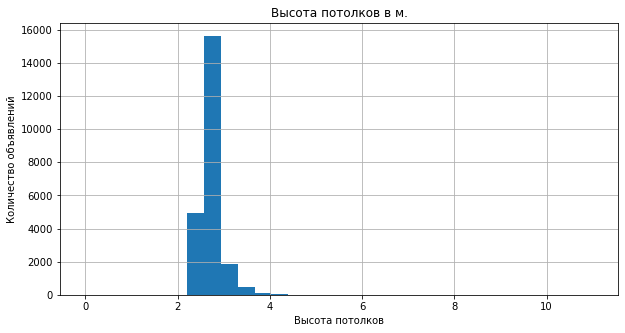

In [121]:
data['ceiling_height'].hist(bins=30,range=(0, 11), figsize=(10, 5))
plt.title('Высота потолков в м.');
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')

- В большинстве квартир потолки от 2.6 до 2.7 м.
- Средняя высота потолка - 2.69 м.
- Медиана составляет - 2.65 м.
- Минимальная высота потолка - 2.5 м.
- Максимальная высота потолка - 10 м.

***4.6 Этаж квартиры***

In [122]:
data['floor'].describe()

count    23011.000000
mean         5.882969
std          4.874478
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

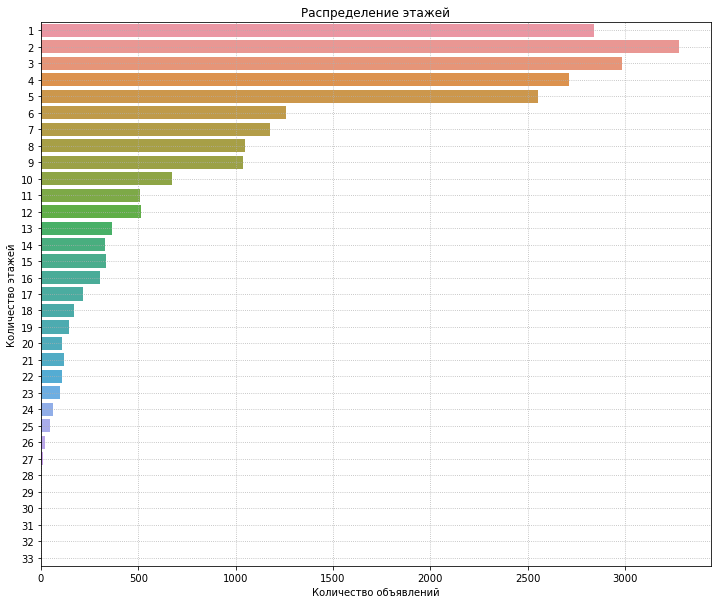

In [123]:
plt.figure(figsize=(12, 10))
sns.countplot(y=data['floor'])
plt.range=(0, 34)
plt.grid(linestyle = ':')
plt.title('Распределение этажей')
plt.xlabel('Количество объявлений')
plt.ylabel('Количество этажей');

- Большинство квартир расположены со 2-го до 8-й этаж.
- Медиана - 2 этаж.
- Самый низкий - 1 этаж.
- Самый высокий - 33 этаж.

***4.7 Тип этажа квартиры («первый», «последний», «другой»)***

In [124]:
data.groupby('type_floor')['floor'].count()

type_floor
другой       16888
первый        2842
последний     3281
Name: floor, dtype: int64

Text(0, 0.5, 'Количество объявлений')

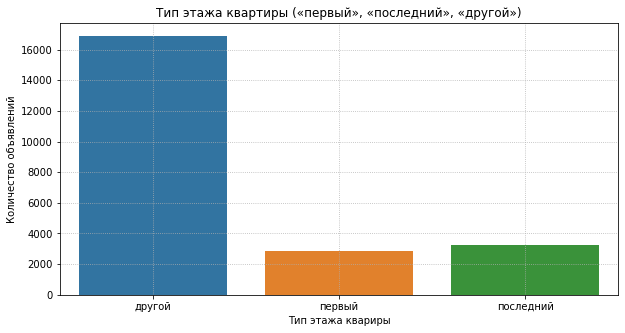

In [125]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['type_floor'])
plt.range=(0, 34)
plt.grid(linestyle = ':')
plt.title('Тип этажа квартиры («первый», «последний», «другой»)');
plt.xlabel('Тип этажа квариры')
plt.ylabel('Количество объявлений')

- Большинство квартир (16888) расположены на этажах категории другой этаж. 
- Минимальное количество квартир (2842) квартир расположено в категории первый этаж.
- Немногим больше (3281) расположено в категории последний этаж.

***4.8 Общее количество этажей в доме***

In [126]:
data['floors_total'].describe()

count    23011.000000
mean        10.681544
std          6.564243
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

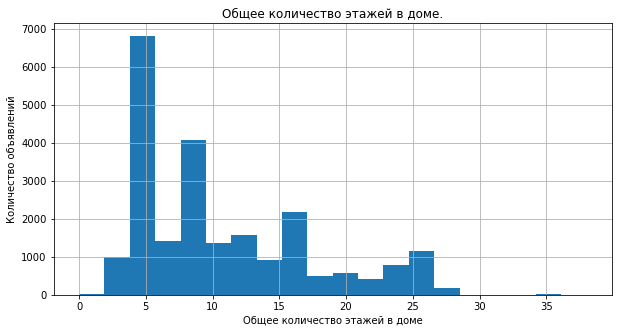

In [127]:
data['floors_total'].hist(bins=20,range=(0, 38), figsize=(10, 5))
plt.title('Общее количество этажей в доме.')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество объявлений');

- В основном квартиры продаются в 5-и, 9-и и 16-и этажных домах.
- Медианой будут 5-и этажные здания.
- Минимум одноэтажки.
- Максимум [ЖК Александр Невский](https://ru.wikipedia.org/wiki/%D0%9A%D0%BD%D1%8F%D0%B7%D1%8C_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9D%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_(%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81)) в 37 этажей.

***4.9 Расстояние до центра города в метрах***

In [128]:
data['city_centers_nearest'].describe() 

count    17662.000000
mean     14320.795550
std       8568.472336
min        181.000000
25%       9502.750000
50%      13180.500000
75%      16355.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64

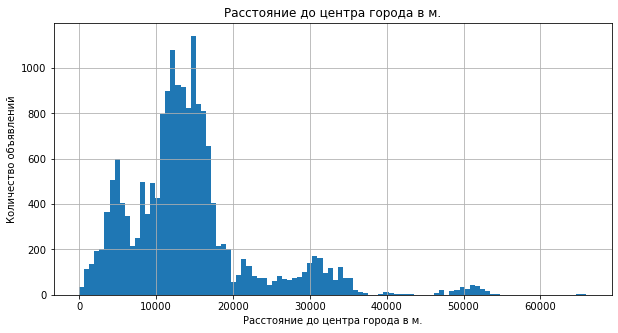

In [129]:
data['city_centers_nearest'].hist(bins=100,range=(0, 65968), figsize=(10, 5))
plt.title('Расстояние до центра города в м.')
plt.xlabel('Расстояние до центра города в м.')
plt.ylabel('Количество объявлений');

- Большинство домов расположено в 9502-и - 16355 м. от центра города.
- В среднем растояние до дома от центра города - 14320 м.
- Самый близкий дом находится в 181 м. от центра города.
- Самый далекий дом расположен в 65968-и м. от центра города.

***4.10 Расстояние до ближайшего аэропорта***

In [130]:
data['airports_nearest'].describe() 

count    17642.000000
mean     28868.612232
std      12688.584485
min       6450.000000
25%      18503.000000
50%      26880.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

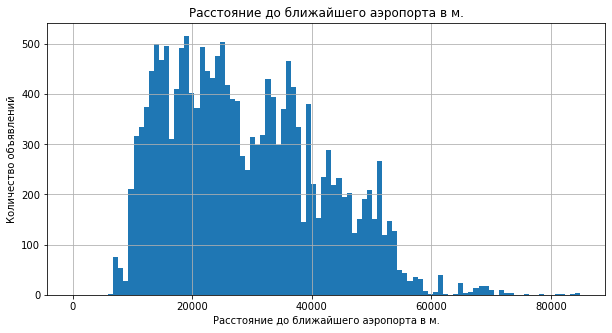

In [131]:
data['airports_nearest'].hist(bins=100,range=(0, 84869), figsize=(10, 5))
plt.title('Расстояние до ближайшего аэропорта в м.')
plt.xlabel('Расстояние до ближайшего аэропорта в м.')
plt.ylabel('Количество объявлений');

- Большинство домов расположено в 18503-х - 37407 м. от аэропорта.
- В среднем растояние до дома от аэропорта - 28869 м.
- Самый близкий дом находится в 6450 м. от аэропорта.
- Самый далекий дом расположен в 84869-и м. от аэропорта.

***4.11 Расстояние до ближайшего парка***

In [132]:
data['parks_nearest'].describe() 

count    7780.000000
mean      493.311311
std       343.924133
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

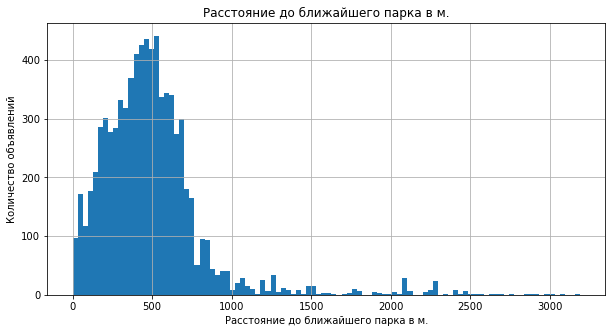

In [133]:
data['parks_nearest'].hist(bins=100,range=(0, 3190), figsize=(10, 5))
plt.title('Расстояние до ближайшего парка в м.')
plt.xlabel('Расстояние до ближайшего парка в м.')
plt.ylabel('Количество объявлений');

- Большинство домов расположено в 456-и - 613 м. от ближайшего парка.
- В среднем растояние до дома от ближайшего парка - 493-х м.
- Самый близкий дом находится в 1-ом м. от ближайшего парка.
- Самый далекий дом расположен в 3190 м. от ближайшего парка.

***4.12 День и месяц публикации объявления***

Посмотрим в какие дни недели пользователи активнее публиковали объявления(0 - понедельник, 1 - вторник и т.д.):

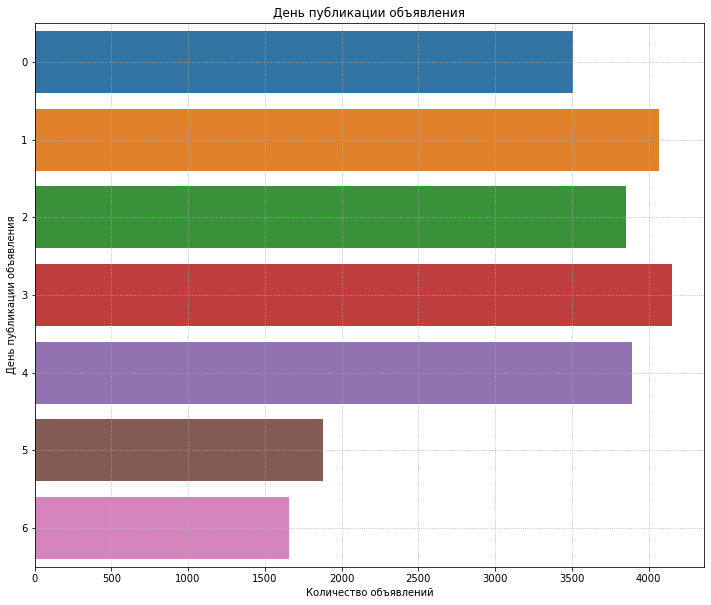

In [134]:
plt.figure(figsize=(12, 10))
sns.countplot(y=data['weekday_publication'])
plt.range=(0, 15)
plt.grid(linestyle = ':')
plt.title('День публикации объявления')
plt.xlabel('Количество объявлений')
plt.ylabel('День публикации объявления');

In [135]:
pd.DataFrame(data['weekday_publication'].value_counts()/52).sort_index().astype('int')

,weekday_publication
0,67
1,78
2,74
3,79
4,74
5,36
6,31


Из данных видно, что активность практически равномерно распределена по будням, чуть ниже активность в понедельник. Тогда как в выходные активность падает в 2 раза.

Посмотрим в какие месяцы пользователи активнее публиковали объявления:

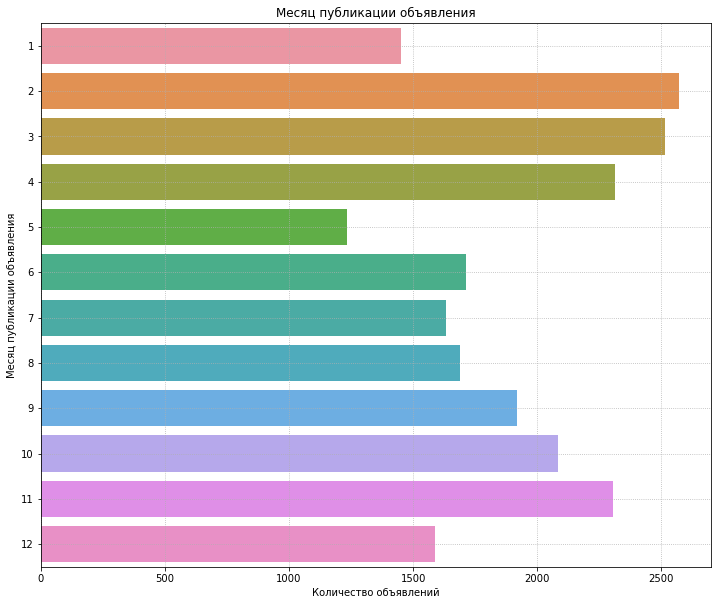

In [136]:
plt.figure(figsize=(12, 10))
sns.countplot(y=data['month_publication'])
plt.range=(0, 15)
plt.grid(linestyle = ':')
plt.title('Месяц публикации объявления')
plt.xlabel('Количество объявлений')
plt.ylabel('Месяц публикации объявления');

In [137]:
data['month_publication'].value_counts().sort_index()

1     1450
2     2570
3     2516
4     2312
5     1235
6     1713
7     1631
8     1690
9     1919
10    2082
11    2306
12    1587
Name: month_publication, dtype: int64

Самыми пиковыми являются февраль, март и апрель - в районе 2500 объявлений в месяц. Ожидаемый спад в мае и декабре - феврале в связи с длинными праздниками. Летом активность тоже не большая - 1600-1700 объявлений в месяц.

***4.13 Изучим, как быстро продавались квартиры (столбец days_exposition)***

In [138]:
data['days_exposition'].describe()

count    19936.000000
mean       180.062901
std        218.441197
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

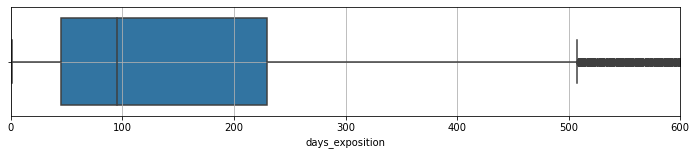

In [139]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['days_exposition'])
plt.xlim(0, 600)
plt.grid();

Построим гистограмму, отбросив выбросы:

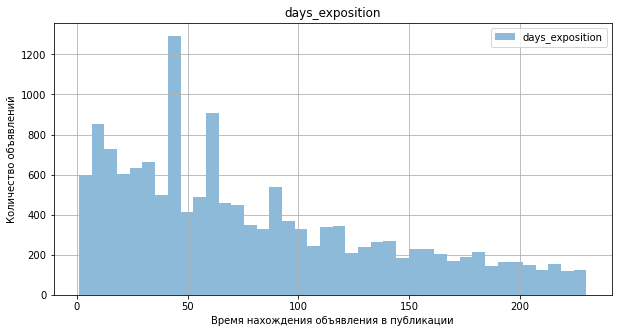

In [140]:
data.query('days_exposition<=230').plot(y='days_exposition',kind = 'hist', alpha=0.5, \
    title = 'days_exposition', bins = 40, grid=True, figsize=(10,5))
plt.xlabel('Время нахождения объявления в публикации')
plt.ylabel('Количество объявлений');

- Быстрыми будем считать продажи попавшие в первый квантиль - 45 дней.
- Аномально долгими продажи - больше 200 дней.
- Нормальными продажами будем считать медиану - 95 дней. 

Сделаем срез по дням размещения объявлений и отсортируем:

In [141]:
data['days_exposition'].value_counts().head()

45.0    856
60.0    532
7.0     226
30.0    202
90.0    187
Name: days_exposition, dtype: int64

Мы видим что время существования первой пятерки объявлений в нашем срезе имеет имеет явно искусственно вызванный характер.
Посмотрим правила размещения объявлений на [Яндекс Недвижимость:](https://yandex.ru/support/realty/owner/home/add-ads-housing.html#concept_ohg_pft_flb)

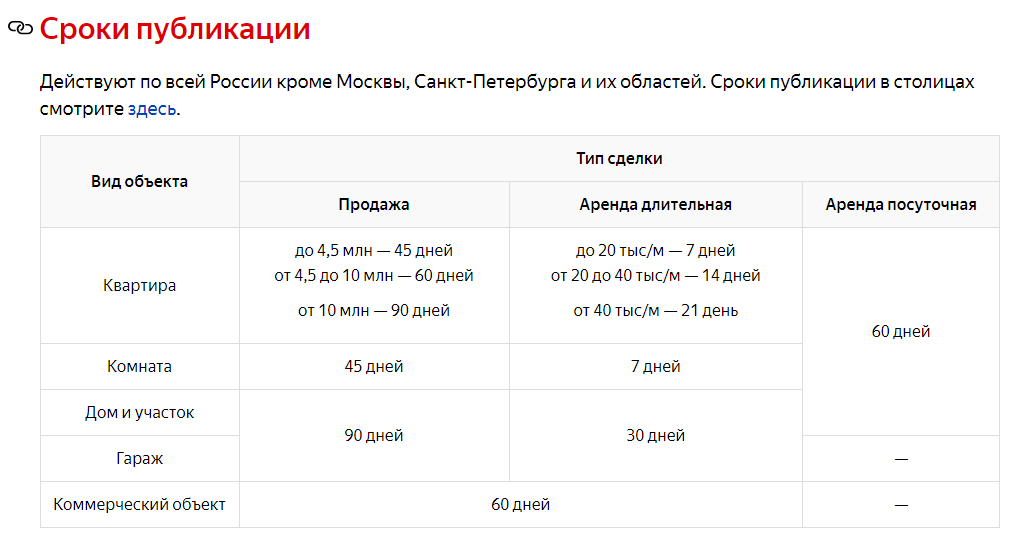

Пики в 45 и 60  и 90 дней мы объясним правилами размещения объявлений на Яндекс Недвижимости. По поводу 30 и 7 дней, мы можем предположить, что в 2017 -2019 годах в Яндекс Недвижимость были другие правила размещения объявлений.

***4.14 Определим какие факторы больше всего влияют на общую (полную) стоимость объекта?***

Построим графики визуализирющие зависимость полной стоимости от указанных ниже параметров:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количество комнат;
 - типа этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год);

Посмотрим коэффиценты корреляции для параметров:

In [142]:
factors = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor']]

In [143]:
factors.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.773152,0.666153,0.606882,0.476308
total_area,0.773152,1.000000,0.929277,0.594419,0.788010
living_area,0.666153,0.929277,1.000000,0.371669,0.865742
kitchen_area,0.606882,0.594419,0.371669,1.000000,0.235714
rooms,0.476308,0.788010,0.865742,0.235714,1.000000


Видим связь стоимости с общей площадью. Чуть меньше связь стоимости и жилой площади, еще чуть меньше стоимость икухонной площади.

Построим графики:

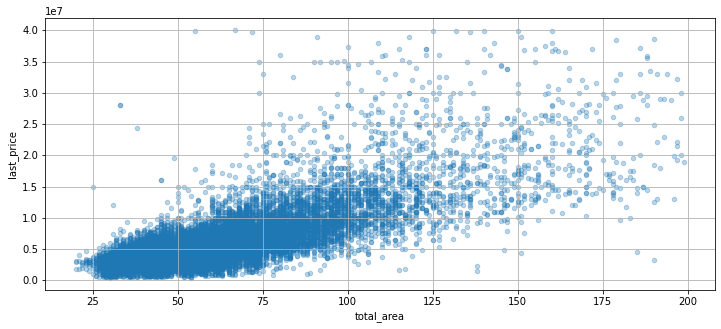

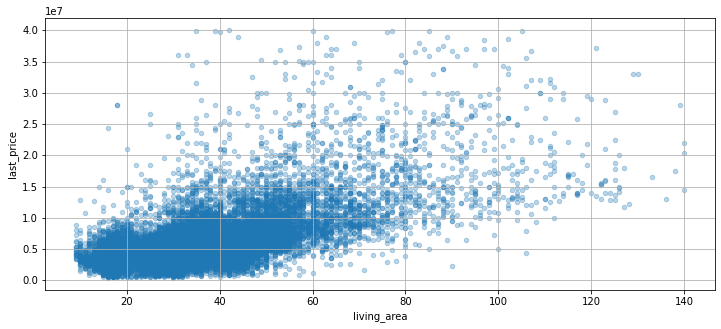

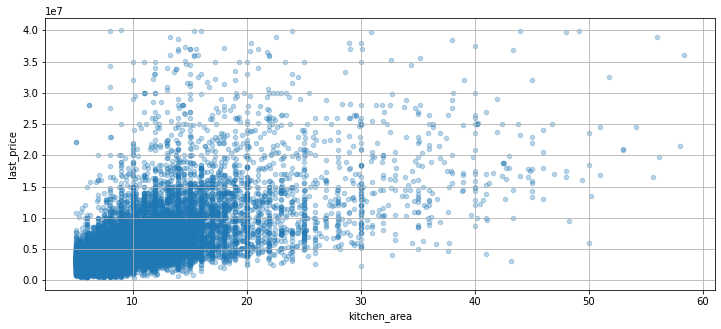

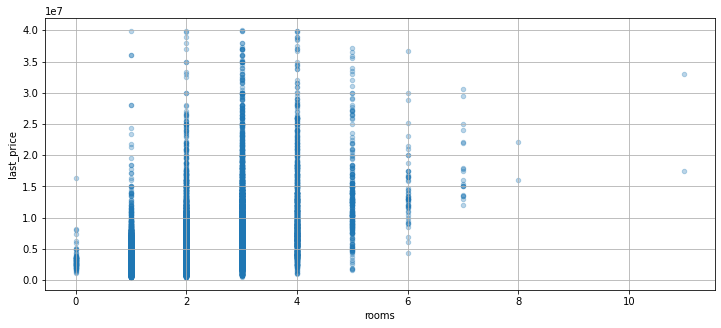

In [144]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, grid=True, figsize=(12, 5))
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, grid=True, figsize=(12, 5))
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, grid=True, figsize=(12, 5))
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3, grid=True, figsize=(12, 5));

Попробуем выявить связь количества комнат с общей площадью: 

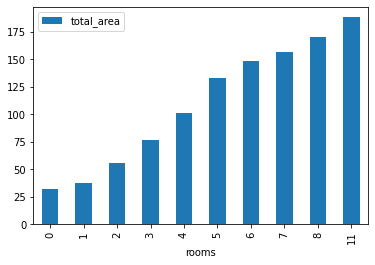

In [145]:
factors.pivot_table(index='rooms', values='total_area', aggfunc = 'mean').plot.bar();

- Стоимость квартиры зависит от общей площади. 
- Жилая площадь, площадь кухни и количество комнат косвенно влияет на стоимость квартиры через общую площадь.

Посмотрим как тип этажа, на котором расположена квартира (первый, последний, другой) и даты размещения (день недели, месяц, год) влияют на стоимость жилья:

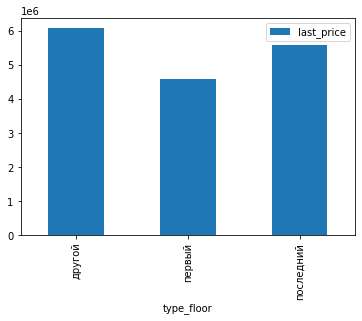

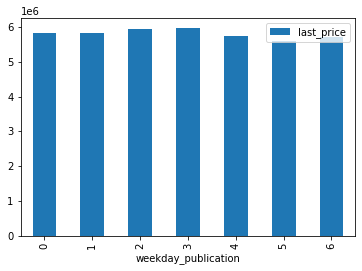

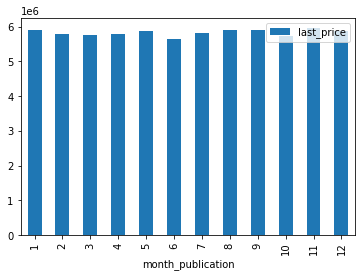

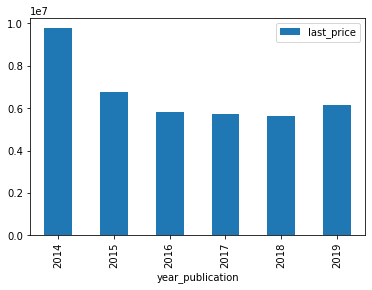

In [146]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='mean').plot.bar()
data.pivot_table(index='weekday_publication', values='last_price', aggfunc='mean').plot.bar()
data.pivot_table(index='month_publication', values='last_price', aggfunc='mean').plot.bar()
data.pivot_table(index='year_publication', values='last_price', aggfunc='mean').plot.bar();

- Квартиры на первом этаже стоят дешевле, чем все остальные. Квартиры на последнем этаже, стоят дешевле, чем квариры на других этажах, но дороже чем на первом.
- Дени недели и месяцы не влияют на стоимость квартиры.
- В 2014 году были самые высокие цены на недвижимость в Ленинградской области. В последующие годы стоимость просела и сильно не менялась.

***Выводы:***

1. Самое сильное вляние на стоимость жилья оказывает общая площадь.
2. Жилая площадь, площадь кухни и количество комнат косвенно влияет на стоимость через общую площадь.
3. Квартиры на первом этаже стоят дешевле всех остальных.
4. После 2014 года рынок недвижимости в Ленинградской области просел примерно на 30%.

***4.14 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***

Соберем сводную таблицу из стобцов со стоимостью, ценой за м2, и названиями населенных пунктов:

In [147]:
top_10 = (data
            .pivot_table(index='locality_name', 
                         aggfunc={'last_price':'count', 'square_meter_price':'mean'})
            .sort_values(by='last_price', ascending=False)
            ).head(10)
top_10 = top_10.sort_values(by='square_meter_price', ascending=False)

Выведем таблицу вместе с графиком:

                   last_price  square_meter_price
locality_name                                    
Санкт-Петербург         15241            111976.0
Пушкин                    358            103470.0
деревня Кудрово           275             92364.0
поселок Парголово         325             90933.0
поселок Мурино            503             85067.0
поселок Шушары            431             78447.0
Колпино                   336             75552.0
Гатчина                   302             69137.0
Всеволожск                394             69035.0
Выборг                    233             58016.0


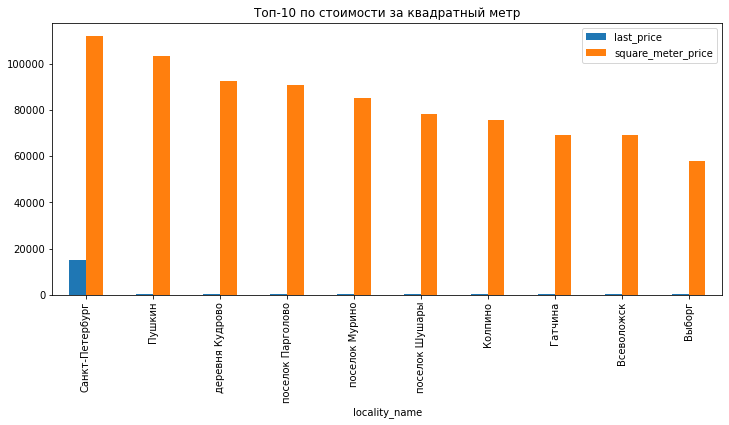

In [148]:
print(round(top_10.head(10)))
top_10.plot(figsize=(12,5), kind='bar',title = 'Топ-10 по стоимости за квадратный метр');

***Вывод:***

Самая высокая стоимость за квадратный метр и количеству объявлений у Санкт-Петербурга, а самая низкая в десятке у Выборга.
В Топ-10 входят ближайшие к Санкт-Петербургу города

***4.15 Вычислим среднюю цену каждого километра для Санкт-Петербурга***

In [149]:
spb_mean_price = round(pd.pivot_table(data.query('locality_name == "Санкт-Петербург"'), index = 'city_centers_nearest_km',\
                         values = 'square_meter_price',\
                         aggfunc = 'mean'))

In [150]:
spb_mean_price.head(20)

,square_meter_price
city_centers_nearest_km,
0,146779.0
1,139823.0
2,127103.0
3,120090.0
4,134647.0
5,135585.0
6,139238.0
7,130873.0
8,120961.0


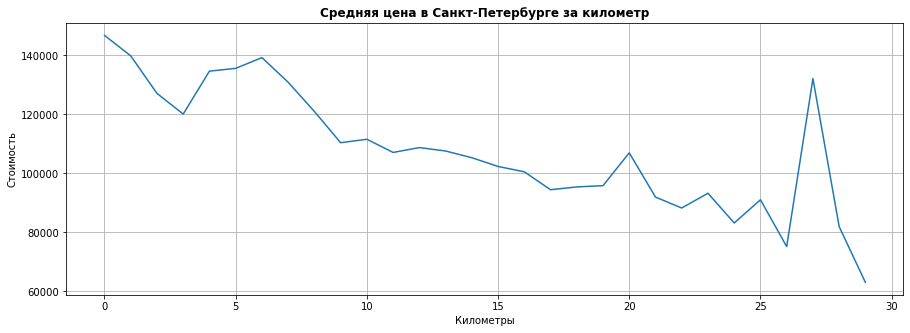

In [151]:
plt.figure(figsize=(15, 5))
plt.plot(spb_mean_price)
plt.title('Средняя цена в Санкт-Петербурге за километр', fontweight='bold')
plt.xlabel('Километры')
plt.ylabel('Стоимость') 
plt.grid();

***Вывод:***

Судя по графику, центр города заканчивается на 6-м километре. После него как раз характерное падение стоимости м2.

Чем ближе к центру города, тем выше стоимоть квадратного метра - это логично, но с некоторыми оговорками: Санкт-Петербург старый город и он не однороден. По этому в радиусе километра от самого центра могут продаваться квартиры в обветшалых домах или в плохом состоянии, а за 27 километров от центра может стоять элитный жилой комплекс или коттеджный поселок с ценой за квадратный метр идентичной самому центру города. Очень мало информации, чтобы строить какие либо гипотезы. 

### Общий вывод

***В ходе исследования была проведена следущая работа:***

***1. Ознакомление с данными***
- Был открыт и изучен датафрейм, выведена основная информация и построены общие гитограммы.
- Были определены пропущенные значения в 14 стобцах и обнаружены признаки аномалий.
***2. Предобработка данных***
- Везде, где это было возможным без нанесение крупного ущерба были заполнены пропущенные значения.
- Не заполненными остались только картографические данные, которые добавлялись в базу автоматически, а не вносились пользователем вручную. На это стоит обратить внимание дата-инженерам! Так-же был оставлен незаполненным столбец с временем публикации, в связи с тем, что на момент выгрузки базы, обявления небыли сняты.
- Были обработанны аномальные значения с потерей 2.9% от общего количества данных.
- Так-же были изменены типы данных, для удобства из обработки.
- Устраннены неявные дубликаты в стобце с названиями населенных пунктов.
- Посчитано и добавлено в таблицу: 
    - цена одного квадратного метра, 
    - день публикации объявления (0 - понедельник, 1 - вторник и т.д.), 
    - месяц публикации, объявления, 
    - год публикации объявления, 
    - тип этажа квартиры (значения — «первый», «последний», «другой»), 
    - расстояние в км до центра города.
***3. Исследовательский анализ данных***
- Были изучены и описаны следующие параметры:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления
- Построены гистограммы для каждого параметра
- Изучено, как быстро продавались квартиры (столбец days_exposition)
- Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Вычислена средняя цену каждого километра в Санкт-Петербурге

***4. Общие выводы***

***Общая площадь***
- Большинство квартир имеют общую площадь от 40 до 69 м2.
- Средняя общая площадь квартиры - 57.94 м2.
- Медиана составляет - 52.00 м2.
- Минимальная общая площадь квартиры - 20 м2.
- Максимальная общая площадь квартиры - 199 м2.

***Жилая площадь***
- Большинство квартир имеют жилую площадь от 19 до 42 м2.
- Средняя жилая площадь квартиры - 32.99 м2.
- Медиана составляет - 30 м2.
- Минимальная общая площадь квартиры - 9 м2.
- Максимальная общая площадь квартиры - 140 м2.

***Площадь кухни***
- Большинство квартир имеют площадь кухни от 7 до 12 м2.
- Средняя жилая площадь кухни - 10.35 м2.
- Медиана составляет - 9.10 м2.
- Минимальная общая площадь кухни - 5 м2.
- Максимальная общая площадь квартиры - 58.40 м2.

***Цена объекта***
- Большинство квартир стоят от 3450000 до 6700000 р.
- Средняя стоимость квартиры - 5827374.69 р.
- Медиана составляет - 4646500 р.
- Минимальная стоимость квартиры - 430000 р.
- Максимальная стоимость квартиры - 39990000 р.

***Количество комнат***
- В большинстве квартир от 1-й до 3-х комнат.
- В среднем в квартирах - 2 комнаты.
- В некоторых квартирах комнаты отсутвуют. Это или студии или квартиры свободной планировки.
- Максимальное количество комнат в квартире - 11. Но квартир с количеством комнат от 6 до 11, практитчески также мало, как студий и квартир свбодной планировки.

***Высота потолков***
- В большинстве квартир потолки от 2.6 до 2.7 м.
- Средняя высота потолка - 2.69 м.
- Медиана составляет - 2.65 м.
- Минимальная высота потолка - 2.5 м.
- Максимальная высота потолка - 10 м.

***Этаж квартиры***
- Большинство квартир расположены со 2-го до 8-й этаж.
- Медиана - 2 этаж.
- Самый низкий - 1 этаж.
- Самый высокий - 33 этаж.

***Тип этажа квартиры («первый», «последний», «другой»)***
- Большинство квартир (16888) расположены на этажах категории другой этаж.
- Минимальное количество квартир (2842) квартир расположено в категории первый этаж.
- Немногим больше (3281) расположено в категории последний этаж.

***Общее количество этажей в доме***
- В основном квартиры продаются в 5-и, 9-и и 16-и этажных домах.
- Медианой будут 5-и этажные здания.
- Минимум одноэтажки.
- Максимум ЖК Александр Невский в 37 этажей.

***Расстояние до центра города в метрах***
- Большинство домов расположено в 9502-и - 16355 м. от центра города.
- В среднем растояние до дома от центра города - 14320 м.
- Самый близкий дом находится в 181 м. от центра города.
- Самый далекий дом расположен в 65968-и м. от центра города.

***Расстояние до ближайшего аэропорта***
- Большинство домов расположено в 18503-х - 37407 м. от аэропорта.
- В среднем растояние до дома от аэропорта - 28869 м.
- Самый близкий дом находится в 6450 м. от аэропорта.
- Самый далекий дом расположен в 84869-и м. от аэропорта.

***Расстояние до ближайшего парка***
- Большинство домов расположено в 456-и - 613 м. от ближайшего парка.
- В среднем растояние до дома от ближайшего парка - 493-х м.
- Самый близкий дом находится в 1-ом м. от ближайшего парка.
- Самый далекий дом расположен в 3190 м. от ближайшего парка.

***День и месяц публикации объявления***
- Самыми пиковыми являются февраль, март и апрель - в районе 2500 объявлений в месяц. 
- Ожидаемый спад в мае и декабре - феврале в связи с длинными праздниками. 
- Летом активность тоже не большая - 1600-1700 объявлений в месяц.

***Изучили, как быстро продавались квартиры (столбец days_exposition)***
- Быстрыми будем считать продажи попавшие в первый квантиль - 45 дней.
- Аномально долгими продажи - больше 200 дней.
- Нормальными продажами будем считать медиану - 95 дней.

***Определили какие факторы больше всего влияют на общую (полную) стоимость объекта***
- Самое сильное вляние на стоимость жилья оказывает общая площадь.
- Жилая площадь, площадь кухни и количество комнат косвенно влияет на стоимость через общую площадь.
- Квартиры на первом этаже стоят дешевле всех остальных.
- После 2014 года рынок недвижимости в Ленинградской области просел примерно на 30%.

***Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***
- Самая высокая стоимость за квадратный метр и количеству объявлений у Санкт-Петербурга, 
а самая низкая в десятке у Выборга. В Топ-10 входят ближайшие к Санкт-Петербургу города

***Вычислили среднюю цену каждого километра для Санкт-Петербурга***
- Чем ближе к центру города, тем выше стоимоть квадратного метра - это логично, но с некоторыми оговорками: 
Санкт-Петербург старый город и он не однороден. По этому в радиусе километра от самого центра могут 
продаваться квартиры в обветшалых домах или в плохом состоянии, а за 27 километров от центра 
может стоять элитный жилой комплекс или коттеджный поселок с ценой за квадратный метр идентичной 
самому центру города. Очень мало информации, чтобы строить какие либо гипотезы.
